# Logistic Regression
 
> In statistics the logistic model is used to model propbability of a certain class or event existing such as pass/fail, win/lose, alive/dead. 


> Linear Vs Logistics
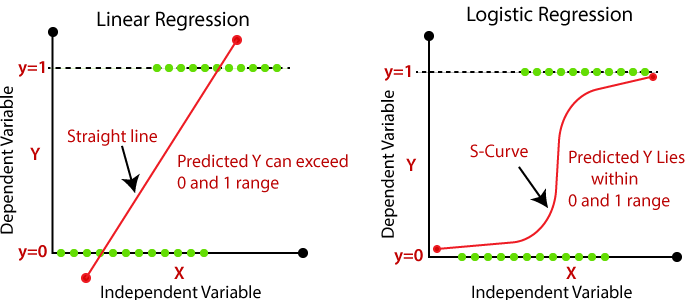
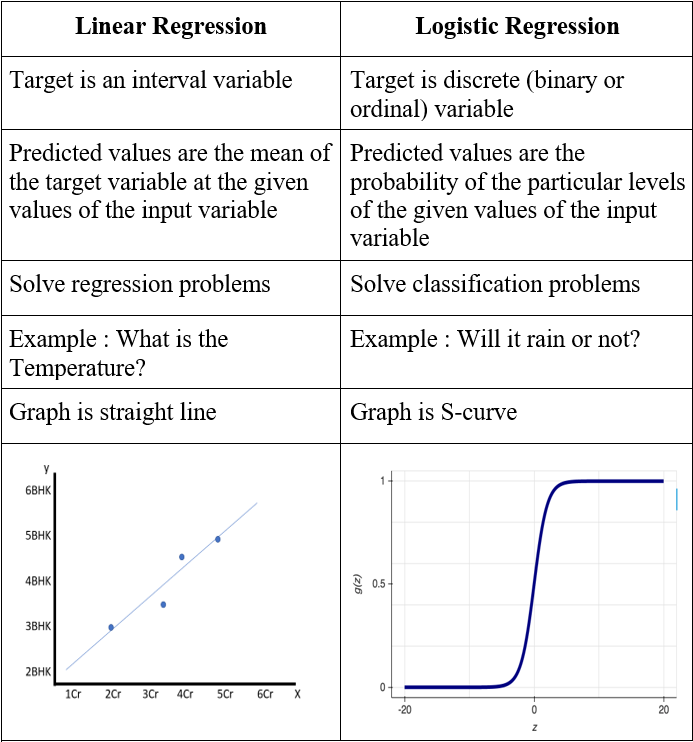



 








> Sometimes we need normalization or scaling
 * The goal of normalization is to change the values of numeric columns in the dataset to a common scale,without distorting the differences in the ranges of values.(100,200,432,430-> 0.1,0.2,0.43,0.43)
 * Methods of Data Normalization – Decimal Scaling,Min-Max Normalization,z-Score Normalization(zero-mean Normalization)
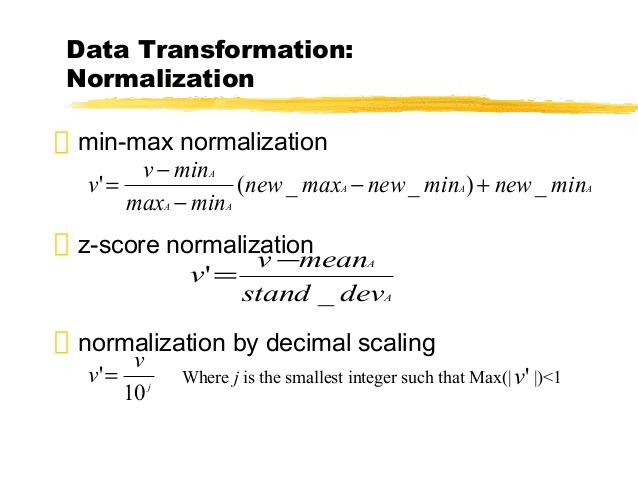


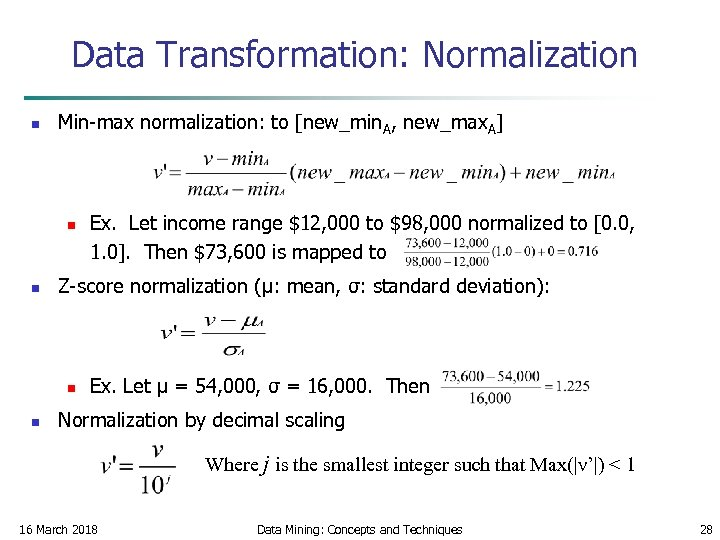



> Types of Scaler

*   Min Max Scaler(0,1)  xnormalized=(x-xmin)/(xmax-xmin)
*   Standard scaler (0 as median) z=(x-u)/σ  u is mean and σ is std. deviation






 



 





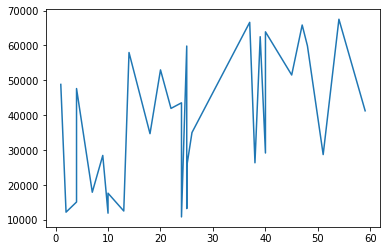

In [ ]:
#NORMALIZATION
import matplotlib.pyplot as plt

np.random.seed(0)
x1=np.random.randint(1,60,30)
x1=np.sort(x1)
x2=np.random.randint(10000,70000,30)
plt.plot(x1,x2)

[0.         0.01724138 0.05172414 0.05172414 0.10344828 0.13793103
 0.15517241 0.15517241 0.20689655 0.22413793 0.29310345 0.32758621
 0.36206897 0.39655172 0.39655172 0.4137931  0.4137931  0.4137931
 0.43103448 0.62068966 0.63793103 0.65517241 0.67241379 0.67241379
 0.75862069 0.79310345 0.81034483 0.86206897 0.9137931  1.        ] [0.67034111 0.02409256 0.07539948 0.6494409  0.12487213 0.31099862
 0.01894247 0.11996896 0.02996578 0.83172246 0.4211436  0.74378285
 0.54894353 0.57719849 0.         0.86447494 0.04271756 0.25484144
 0.42685809 0.98435571 0.27380155 0.91170764 0.3233271  0.9363646
 0.71796183 0.97079262 0.86544499 0.3153374  1.         0.53675615]


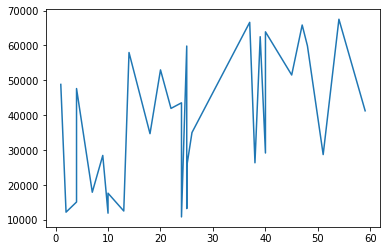

In [ ]:
x1min=min(x1)
x1max=max(x1)
x2min=min(x2)
x2max=max(x2)
x1norm=(x1-x1min)/(x1max-x1min)
x2norm=(x2-x2min)/(x2max-x2min)
print(x1norm,x2norm)
plt.plot(x1,x2)

In [5]:
import pandas as pd

df=pd.read_csv('https://raw.githubusercontent.com/sudarshan-koirala/Logistic-Regression-Social-Network-Ads/master/Social_Network_Ads.csv')
print(df.head())

print("Coumns we have: ",df.columns)
print("info",df.info())

    User ID  Gender   Age  EstimatedSalary  Purchased
0  15624510    Male  19.0          19000.0          0
1  15810944    Male  35.0          20000.0          0
2  15668575  Female  26.0          43000.0          0
3  15603246  Female  27.0          57000.0          0
4  15804002    Male  19.0          76000.0          0
Coumns we have:  Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   User ID          400 non-null    int64  
 1   Gender           400 non-null    object 
 2   Age              400 non-null    float64
 3   EstimatedSalary  400 non-null    float64
 4   Purchased        400 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 15.8+ KB
info None


In [23]:
# x=df.iloc[:,[2,3]].values   same
x=df.iloc[:,2:4].values
y=df.iloc[:,4].values
print(x.ndim)
print("Count of purchased or not purchased: \n",df['Purchased'].value_counts())
 

2
Count of purchased or not purchased: 
 0    257
1    143
Name: Purchased, dtype: int64



In [66]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.8,random_state=0)

print(f"x_train shape {x_train.shape}")
print(f"x_test shape {x_test.shape}")
print(f"y_train shape {y_train.shape}")
print(f"y_test shape {y_test.shape}")
#training 75% and testing 25%

x_train shape (80, 2)
x_test shape (320, 2)
y_train shape (80,)
y_test shape (320,)


In [67]:
import numpy as np

print(np.unique(y_train,return_counts=True))
print(np.unique(y_test,return_counts=True))

from sklearn.linear_model import LogisticRegression

model=LogisticRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print(y_pred)

print(y_test)
#This is beacuse The salary and age are not in normalized form ie btw 0 and 1.

from sklearn.metrics import  accuracy_score
accuracy_score(y_pred,y_test)# this gives 68%

(array([0, 1]), array([56, 24]))
(array([0, 1]), array([201, 119]))
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1
 0 0 0 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 0 0 0 1 0 1 1 1 0 1 0 1 1 1 0 0 0 0 0
 0 1 1 1 0 1 0 0 1 0 1 0 1 0 0 1 1 1 1 0 1 0 1 0 0 1 0 0 

0.628125

In [68]:
#do normalization for our data

#for training set we do fit_transform beaucse we need to compute features and then use it to autoscale the data
#for testing we already have features ,so we only do the transform part.
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
x_train=scale.fit_transform(x_train) #fit transform
x_test=scale.transform(x_test)   #only transform

In [69]:
model=LogisticRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print(y_pred)

print(y_test)


from sklearn.metrics import  accuracy_score
accuracy_score(y_pred,y_test)# this gives 89%
#test_size=0.3, 84%
#test_size=0.5, 77.5%
#test_size=0.1 95%
#test_size=0.8 75%


#print(x_train)#This is how the vlaues are scale down btw 0 and 1

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0]
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1
 0 0 0 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 0 0 0 1 0 1 1 1 0 1 0 1 1 1 0 0 0 0 0
 0 1 1 1 0 1 0 0 1 0 1 0 1 0 0 1 1 1 1 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 1 1 1
 1 0 0 0 1 0 1 0 1 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1 0

0.753125

In [61]:
#Confusion matrix

from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred,y_test)#TP FP TN FN

# in order to improve accuracy : one way is to specify the test_size=0.3 in train_test_split()
#or else use svm

array([[117,  39],
       [  6,  38]])